In [29]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tanmayjune/bank-customer-transaction-analysis")

print("Path to dataset files:", path)

100%|██████████| 87.0M/87.0M [00:00<00:00, 118MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tanmayjune/bank-customer-transaction-analysis/versions/1


In [3]:
rfm = pd.read_csv(os.path.join(path, "RFM.csv"))
bank_customer_transactions = pd.read_csv(os.path.join(path, "bank_customer_transactions.csv"))
customers = pd.read_csv(os.path.join(path, "customers.csv"))
foreign_customer_dataset = pd.read_csv(os.path.join(path, "foreign_customer_dataset.csv"))
fraud_dataset = pd.read_csv(os.path.join(path, "fraud_dataset.csv"))
transactions = pd.read_csv(os.path.join(path, "transactions.csv"))
customer_agg = pd.read_csv(os.path.join(path, "customer_agg.csv"))
cleaned_dataset = pd.read_csv(os.path.join(path, "cleaned_dataset.csv"))

In [4]:
rfm

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment,Segment_Final
0,0,C1010011,25,2,5106.0,5,5,5,555,Champions,Champions
1,1,C1010012,68,1,1499.0,2,1,4,214,At Risk (Inactive),Needs Attention
2,2,C1010014,75,2,1455.0,1,5,4,154,At Risk (High-value),Critical
3,3,C1010018,36,1,30.0,5,1,1,511,New Customers,New Customers
4,4,C1010024,64,1,5000.0,2,1,5,215,At Risk (Inactive),Needs Attention
...,...,...,...,...,...,...,...,...,...,...,...
838365,838365,C9099836,75,1,691.0,1,5,3,153,Need Attention,Critical
838366,838366,C9099877,36,1,222.0,5,5,2,552,Potential Loyalists,"Active, Low-Spenders"
838367,838367,C9099919,64,1,126.0,2,5,1,251,Uncategorized,At Risk/ Lost
838368,838368,C9099941,54,1,50.0,3,5,1,351,Uncategorized,"Active, Low-Spenders"


In [5]:
bank_customer_transactions

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [6]:
customers

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,C5841053,10/1/94,F,JAMSHEDPUR,17819.05
1,C2142763,4/4/57,M,JHAJJAR,2270.69
2,C4417068,26/11/96,F,MUMBAI,17874.44
3,C5342380,14/9/73,F,MUMBAI,866503.21
4,C9031234,24/3/88,F,NAVI MUMBAI,6714.43
...,...,...,...,...,...
995,C8317970,20/4/89,M,ALWAR,1972.42
996,C9099692,27/2/90,F,LUCKNOW,772503.25
997,C1025072,25/6/94,M,DELHI,4356.19
998,C7439786,7/11/95,F,KASHIPUR,1.92


In [7]:
foreign_customer_dataset

,Unnamed: 0,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,80,T81,C8342660,1967-05-04,M,DUBAI,6190.71,2016-08-01,21:06:10,878.00,49
1,673,T674,C2421359,1987-10-05,M,DUBAI,141686.30,2016-10-21,21:20:13,353.00,29
2,947,T948,C7621386,1987-10-05,M,DUBAI,141686.30,2016-10-21,21:16:55,620.00,29
3,1001,T1002,C4488674,1959-12-02,M,WRZESNIA,342979.61,2016-10-21,20:05:32,21230.06,56
4,1223,T1224,C8831623,1962-08-26,F,DUBAI,81427.22,2016-10-21,21:05:14,17500.00,54
...,...,...,...,...,...,...,...,...,...,...,...
3579,1047060,T1047061,C2884845,1979-06-21,F,IRVINE,1640.32,2016-09-18,18:56:20,7457.09,37
3580,1047215,T1047216,C6834842,1987-06-18,M,DUBAI,828645.92,2016-09-18,19:07:08,1854.00,29
3581,1047236,T1047237,C4032440,1981-06-16,M,ABU DHABI,143.28,2016-09-18,02:56:28,30000.00,35
3582,1047332,T1047333,C6012229,1982-05-20,M,MUSCAT,236190.41,2016-09-18,19:56:45,1830.00,34


In [8]:
fraud_dataset

,Unnamed: 0,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),...,DayOfWeek,IsWeekend,IsHoliday,TimeOfDay,IsLateNight,TimeSinceLastTxn,TxnCountInLast24Hours,IsAnomaly,RiskScore,Segment
0,18,T957663,C1010041,1993-09-06,F,DELHI,34119.48,2016-09-10,16:25:33,14500.00,...,Saturday,1,0,Afternoon,0,259200.0,1.0,-1,5.524663,Monitor
1,21,T588034,C1010046,1985-01-30,M,NEW DELHI,2851080.38,2016-08-27,19:56:00,156658.74,...,Saturday,1,0,Evening,0,1123200.0,1.0,-1,23.192597,Critical
2,186,T792121,C1010621,1940-12-24,M,GUWAHATI,4251160.55,2016-09-05,10:59:35,22056.00,...,Monday,0,1,Morning,0,9999999.0,1.0,-1,6.873645,Monitor
3,242,T789608,C1010757,1990-12-03,M,MUMBAI,2198.72,2016-09-05,02:08:54,3200.00,...,Monday,0,1,Late Night,1,604800.0,1.0,-1,8.236949,Medium Priority
4,357,T1045875,C1011140,1975-06-04,M,MUMBAI,15158474.07,2016-09-18,13:05:45,1591.00,...,Sunday,1,0,Afternoon,0,1296000.0,1.0,-1,3.000000,Monitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,983267,T182765,C9069332,1952-07-01,M,BENGALURU,651132.52,2016-08-09,13:24:21,23965.00,...,Tuesday,0,0,Afternoon,0,9999999.0,1.0,-1,4.306104,Monitor
9839,983697,T574246,C9082856,1987-07-09,M,GHAZIABAD,975308.51,2016-08-27,13:07:31,111804.00,...,Saturday,1,0,Afternoon,0,9999999.0,1.0,-1,26.748654,Critical
9840,983837,T265948,C9087239,1958-05-11,F,MUMBAI,685177.14,2016-09-03,12:09:41,22500.00,...,Saturday,1,0,Afternoon,0,9999999.0,1.0,-1,6.134714,Monitor
9841,984006,T909577,C9093042,1984-09-24,M,VADODARA,5548562.26,2016-09-12,14:01:20,4598.00,...,Monday,0,0,Afternoon,0,1814400.0,1.0,-1,0.541726,Monitor


In [9]:
transactions

,TransactionID,CustomerID,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,2/8/16,143207,25.0
1,T2,C2142763,2/8/16,141858,27999.0
2,T3,C4417068,2/8/16,142712,459.0
3,T4,C5342380,2/8/16,142714,2060.0
4,T5,C9031234,2/8/16,181156,1762.5
...,...,...,...,...,...
995,T996,C8317970,21/10/16,210350,27.0
996,T997,C9099692,21/10/16,210357,249.0
997,T998,C1025072,21/10/16,204539,400.0
998,T999,C7439786,21/10/16,202710,23.0


In [10]:
customer_agg

,Unnamed: 0,CustomerID,txn_count,total_spent,avg_spent,max_spent,avg_balance,first_txn_date,last_txn_date,location,gender,recency_days,tenure_days,txn_per_day,avg_spent_pct_balance
0,0,C1010011,2,5106.0,2553.0,4750.0,76340.635,2016-08-09,2016-09-26,NOIDA,F,25,48,0.041667,0.033442
1,1,C1010012,1,1499.0,1499.0,1499.0,24204.490,2016-08-14,2016-08-14,MUMBAI,M,68,0,1.000000,0.061931
2,2,C1010014,2,1455.0,727.5,1205.0,100112.950,2016-08-01,2016-08-07,MUMBAI,F,75,6,0.333333,0.007267
3,3,C1010018,1,30.0,30.0,30.0,496.180,2016-09-15,2016-09-15,CHAMPARAN,F,36,0,1.000000,0.060462
4,4,C1010024,1,5000.0,5000.0,5000.0,87058.650,2016-08-18,2016-08-18,KOLKATA,M,64,0,1.000000,0.057433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838365,838365,C9099836,1,691.0,691.0,691.0,133067.230,2016-08-07,2016-08-07,BHIWANDI,M,75,0,1.000000,0.005193
838366,838366,C9099877,1,222.0,222.0,222.0,96063.460,2016-09-15,2016-09-15,BENGALURU,M,36,0,1.000000,0.002311
838367,838367,C9099919,1,126.0,126.0,126.0,5559.750,2016-08-18,2016-08-18,GUNTUR,M,64,0,1.000000,0.022663
838368,838368,C9099941,1,50.0,50.0,50.0,35295.920,2016-08-28,2016-08-28,CHENNAI,M,54,0,1.000000,0.001417


In [11]:
cleaned_dataset

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0,19
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.5,28
...,...,...,...,...,...,...,...,...,...,...
984242,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,26
984243,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,24
984244,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,27
984245,T1048566,C6420483,1978-08-30,M,PATNA,10117.87,2016-09-18,18:47:06,1000.0,38


## **EDA**

### **RFM Dataset**

In [24]:
# Check unique segments
segment_counts = rfm['Segment_Final'].value_counts()
print(segment_counts)

Segment_Final
Active, Low-Spenders    162336
At Risk/ Lost           127996
New Customers           126398
Critical                108322
Needs Attention          86434
Champions                83305
Promising                77695
Potential High-Value     34713
Elite                    31171
Name: count, dtype: int64


In [22]:
segment_percentages = rfm['Segment_Final'].value_counts(normalize=True) * 100
#print(segment_percentages)

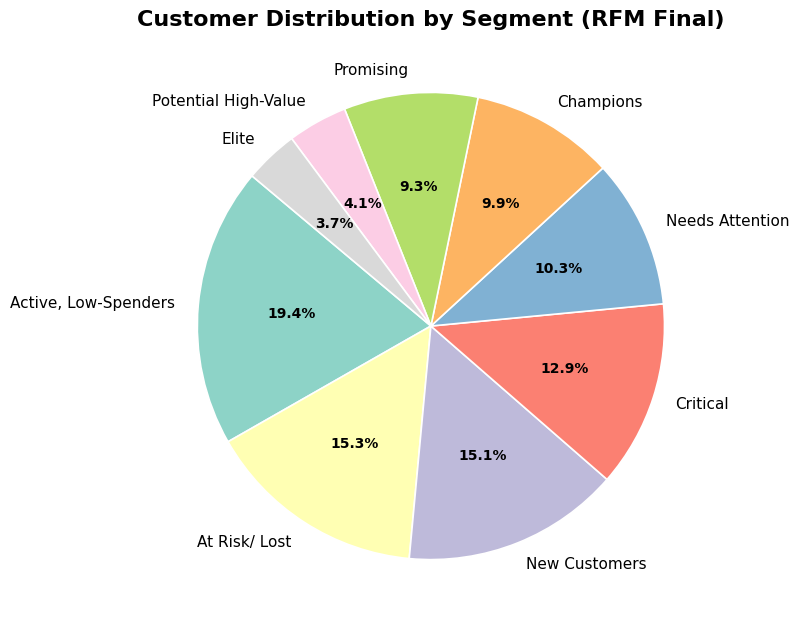

In [31]:
# Colors
colors = plt.cm.Set3.colors

# Plot
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor':'white', 'linewidth':1.2},
    textprops={'fontsize':11}
)

# Adaptive text coloring
for i, autotext in enumerate(autotexts):
    # Get wedge face color
    wedge_color = wedges[i].get_facecolor()
    # Convert RGBA to brightness
    r, g, b, _ = wedge_color
    brightness = np.sqrt(0.299*r**2 + 0.587*g**2 + 0.114*b**2)
    # If wedge is light, use black text, else white
    if brightness > 0.6:
        autotext.set_color('black')
    else:
        autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight("bold")

plt.title("Customer Distribution by Segment (RFM Final)", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

**Choosing RFM Customer Segment for Segmentation:**


*   Skewed distribution: Active, Low-Spenders, At Risk / Lost, and New Customers make up almost 50%
*   Imbalanced
*   Too many categories



### **Bank Customer Transactions Dataset**

### Feature Engineering - 'Age' Column

In [39]:
df = bank_customer_transactions  # your dataframe

# Parse dates (DD/MM/YY)
df['CustomerDOB']     = pd.to_datetime(df['CustomerDOB'],     format='%d/%m/%y', errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y', errors='coerce')

# Fix 2-digit DOBs parsed into the future (e.g., 2057) by anchoring to transaction date
mask = df['CustomerDOB'].notna() & df['TransactionDate'].notna() & (df['CustomerDOB'] > df['TransactionDate'])
df.loc[mask, 'CustomerDOB'] = df.loc[mask, 'CustomerDOB'] - pd.DateOffset(years=100)

# Age at transaction: year diff minus 1 if transaction is before the birthday that year
tx_md  = df['TransactionDate'].dt.month * 100 + df['TransactionDate'].dt.day
dob_md = df['CustomerDOB'].dt.month     * 100 + df['CustomerDOB'].dt.day

df['Age'] = (
    df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
    - (tx_md < dob_md).astype('int64')
).astype('Int64')

In [40]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,42
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38


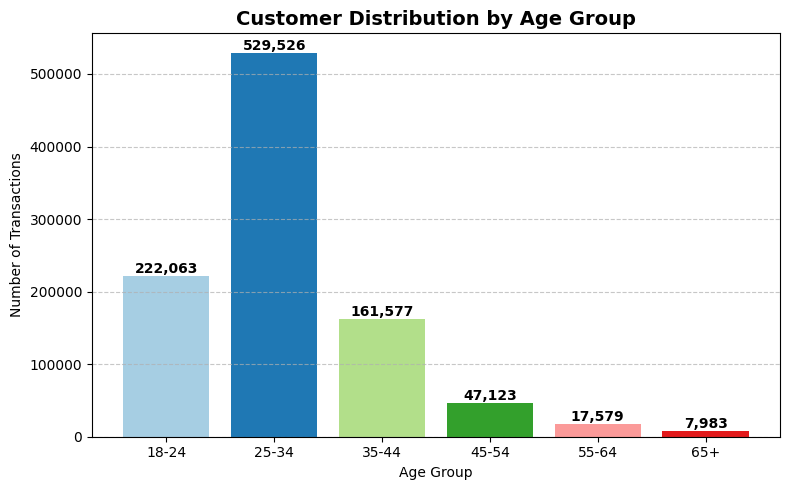

In [43]:
age_counts = df['AgeGroup'].value_counts().sort_index()

plt.figure(figsize=(8,5))
bars = plt.bar(age_counts.index, age_counts.values, color=plt.cm.Paired.colors[:len(age_counts)])

# Add value labels on top
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,}", ha='center', va='bottom', fontsize=10, weight='bold')

plt.title("Customer Distribution by Age Group", fontsize=14, weight='bold')
plt.xlabel("Age Group")
plt.ylabel("Number of Transactions")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

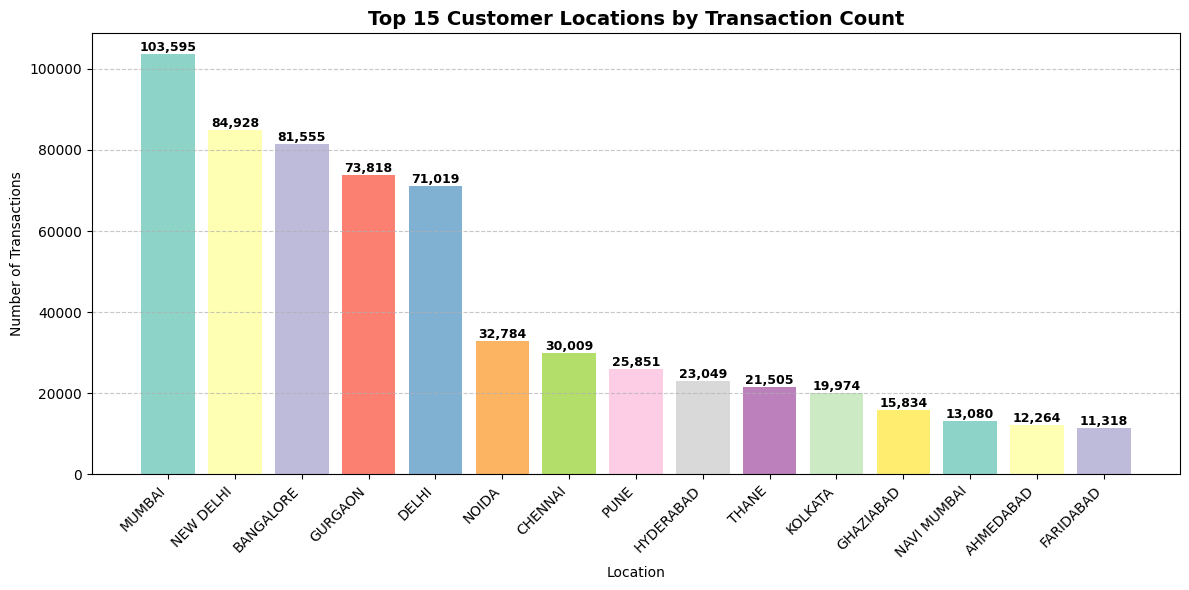

In [44]:
loc_counts = df['CustLocation'].value_counts().head(15)

plt.figure(figsize=(12,6))
bars = plt.bar(loc_counts.index, loc_counts.values, color=plt.cm.Set3.colors)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,}", ha='center', va='bottom', fontsize=9, weight='bold')

plt.title("Top 15 Customer Locations by Transaction Count", fontsize=14, weight='bold')
plt.xlabel("Location")
plt.ylabel("Number of Transactions")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


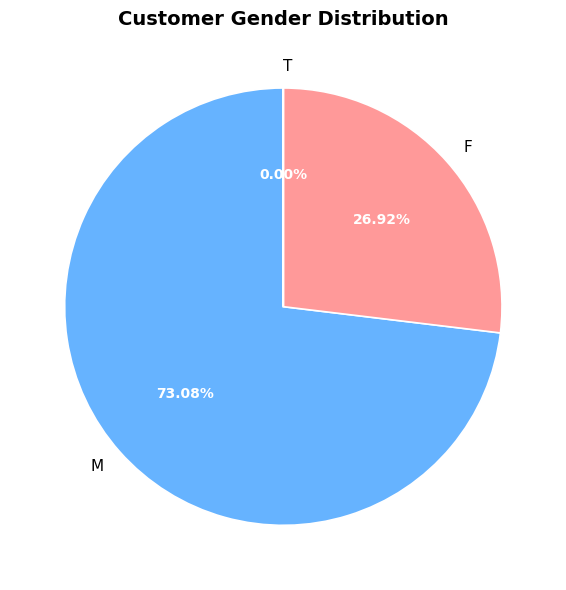

In [47]:
gender_counts = df['CustGender'].value_counts()
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.2},
    textprops={'fontsize':11}
)

# Make percentages bold + visible
for autotext in autotexts:
    autotext.set_weight('bold')
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.title("Customer Gender Distribution", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [50]:
gender_counts

,count
CustGender,
M,765530
F,281936
T,1


In [52]:
# Define age bins
bins = [18, 25, 35, 45, 55, 65, 120]
labels = ['18-24','25-34','35-44','45-54','55-64','65+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Distribution
age_dist = df['AgeGroup'].value_counts().sort_index()
age_perc = round((age_dist / age_dist.sum()) * 100, 2)

age_summary = pd.DataFrame({
    'Count': age_dist,
    'Percentage': age_perc
})
print(age_summary)


           Count  Percentage
AgeGroup                    
18-24     222063       22.53
25-34     529526       53.71
35-44     161577       16.39
45-54      47123        4.78
55-64      17579        1.78
65+         7983        0.81


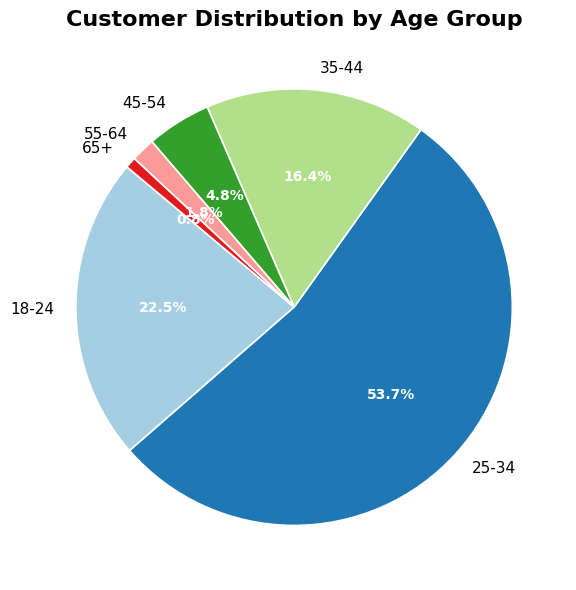

In [55]:
import matplotlib.pyplot as plt

# Pie chart of age distribution
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    age_summary['Count'],
    labels=age_summary.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor':'white','linewidth':1.2},
    textprops={'fontsize':11}
)

# Style % labels
for autotext in autotexts:
    autotext.set_weight("bold")
    autotext.set_fontsize(10)
    autotext.set_color("white")

plt.title("Customer Distribution by Age Group", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDOB              1045170 non-null  datetime64[ns]
 3   CustGender               1047467 non-null  object        
 4   CustLocation             1048416 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  datetime64[ns]
 7   TransactionTime          1048567 non-null  int64         
 8   TransactionAmount (INR)  1048567 non-null  float64       
 9   Age                      1045170 non-null  Int64         
 10  AgeGroup                 985851 non-null   category      
 11  BalanceTier              1046198 non-null  category      
dtype

# **Spender Tiers (Behavior Segmentation)**

In [64]:
bins = [18, 25, 35, 45, 55, 65, 120]
labels = ['18-24','25-34','35-44','45-54','55-64','65+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_counts = df['AgeGroup'].value_counts().sort_index()
age_perc = (age_counts / age_counts.sum()) * 100
print("Age Group Distribution:\n", pd.DataFrame({'Count': age_counts, 'Percentage': age_perc.round(2)}))


Age Group Distribution:
            Count  Percentage
AgeGroup                    
18-24     222063       22.53
25-34     529526       53.71
35-44     161577       16.39
45-54      47123        4.78
55-64      17579        1.78
65+         7983        0.81


In [65]:
print(df['CustAccountBalance'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95]))

count    1.046198e+06
mean     1.154035e+05
std      8.464854e+05
min      0.000000e+00
25%      4.721760e+03
50%      1.679218e+04
75%      5.765736e+04
90%      1.985042e+05
95%      4.161645e+05
max      1.150355e+08
Name: CustAccountBalance, dtype: float64


In [66]:
bins = [0, 10000, 100000, df['CustAccountBalance'].max()]
labels = ['Low','Mid','High']

df['BalanceTier'] = pd.cut(df['CustAccountBalance'], bins=bins, labels=labels, right=False)

bal_counts = df['BalanceTier'].value_counts().sort_index()
bal_perc = (bal_counts / bal_counts.sum()) * 100
print("Balance Tier Distribution:\n", pd.DataFrame({'Count': bal_counts, 'Percentage': bal_perc.round(2)}))

Balance Tier Distribution:
               Count  Percentage
BalanceTier                    
Low          398615       38.10
Mid          468572       44.79
High         179001       17.11


In [67]:
cust_spend = df.groupby('CustomerID')['TransactionAmount (INR)'].sum()

print(cust_spend.describe(percentiles=[0.25,0.5,0.75,0.9,0.95]))

count    8.842650e+05
mean     1.866856e+03
std      7.207210e+03
min      0.000000e+00
25%      2.000000e+02
50%      5.368000e+02
75%      1.500000e+03
90%      3.577000e+03
95%      6.350000e+03
max      1.560035e+06
Name: TransactionAmount (INR), dtype: float64


In [68]:
bins = [0, 5000, 50000, cust_spend.max()]
labels = ['Low Spender','Mid Spender','High Spender']

spender_tier = pd.cut(cust_spend, bins=bins, labels=labels, right=False)

spender_counts = spender_tier.value_counts().sort_index()
spender_perc = (spender_counts / spender_counts.sum()) * 100
print("Spender Tier Distribution:\n", pd.DataFrame({'Count': spender_counts, 'Percentage': spender_perc.round(2)}))

Spender Tier Distribution:
                           Count  Percentage
TransactionAmount (INR)                    
Low Spender              823488       93.13
Mid Spender               57883        6.55
High Spender               2893        0.33
